In [23]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns

In [2]:
# Marker genes:
# not a basic cell type --> 'other'
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListMartinNoLow.csv"
marker_genes = pd.read_csv(path_mg, sep=',', index_col=0)
# print column names
print(marker_genes.columns)

Index(['portal_vein_EC45', 'LSEC45', 'LSEC Portal', 'LSEC Central',
       'central_vein_EC45', 'stellateAll', 'stellate PeriPortal',
       'stellate PeriCentral', 'FibroblastAll', 'fibroblastPortal',
       'FibroblastsCentral', 'VSMC', 'capsular_fibroblasts45',
       'Mesothelial cells', 'Hepatocytes', 'HepatocytesPortal',
       'HepatocytesCentral', 'Cholangiocytes', 'cDC2s', 'Mig. cDCs',
       'Neutrophils', 'Basophils', 'NK cells', 'ILC1s', 'T cells', 'pDCs',
       'B cells', 'cDC1s', 'Kupffer cells', 'Capsule and Central Vein Mac',
       'Portal LAM macrophages', 'Monocytes', 'LECs'],
      dtype='object')


In [3]:
# make a new dataframe
marker_genes_basic = pd.DataFrame()
marker_genes_basic['Hepa'] = marker_genes['Hepatocytes'] + marker_genes['HepatocytesPortal'] + marker_genes['HepatocytesCentral']
marker_genes_basic['LSEC'] = marker_genes['LSEC45'] + marker_genes['LSEC Portal'] + marker_genes['LSEC Central']
marker_genes_basic['Endo vein'] = marker_genes['portal_vein_EC45'] + marker_genes['central_vein_EC45'] 
marker_genes_basic['Chol'] = marker_genes['Cholangiocytes']  
marker_genes_basic['Kupf'] = marker_genes['Kupffer cells']
marker_genes_basic['Stel'] = marker_genes['stellateAll'] + marker_genes['stellate PeriPortal'] + marker_genes['stellate PeriCentral'] 
marker_genes_basic['Fibr'] = marker_genes['FibroblastAll'] + marker_genes['fibroblastPortal'] + marker_genes['FibroblastsCentral'] + marker_genes['capsular_fibroblasts45']
marker_genes_basic['B cell'] = marker_genes['B cells']
marker_genes_basic['Meso'] = marker_genes['Mesothelial cells']  
marker_genes_basic
# if value in marker_genes_basic is > 1, set to 1
marker_genes_basic[marker_genes_basic > 1] = 1
# save to csv
marker_genes_basic.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv")

In [4]:
marker_genes_basic

,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
Column1,,,,,,,,,
Acta2,0,0,0,0,0,0,1,0,0
Adamtsl2,0,0,0,0,0,1,1,0,0
Adgre1,0,0,0,0,1,0,0,0,0
Adgrg6,0,1,1,0,0,0,0,0,0
Atp6v0d2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Vwf,0,0,1,0,0,0,0,0,0
Wnt2,0,1,1,0,0,0,0,0,0
Wnt9b,0,1,1,0,0,0,0,0,0


In [34]:
marker_genes_basic.sum(axis=0)

Hepa         10
LSEC         11
Endo vein     9
Chol          7
Kupf         16
Stel         16
Fibr         21
B cell        4
Meso          5
dtype: int64

In [19]:
def Jaccard(list1,list2):
    list3 = list1 & list2
    list4 = list1 | list2
    Jaccard = np.sum(list3)/np.sum(list4)
    return np.round(Jaccard,3)

In [31]:
Jaccard_sim = pd.DataFrame(index=marker_genes_basic.columns, columns=marker_genes_basic.columns)
for i in marker_genes_basic.columns:
    for j in marker_genes_basic.columns:
        Jaccard_sim.loc[i,j] = Jaccard(marker_genes_basic[i],marker_genes_basic[j])
Jaccard_sim
# covert each entry to float
Jaccard_sim = Jaccard_sim.astype(float)

<AxesSubplot: >

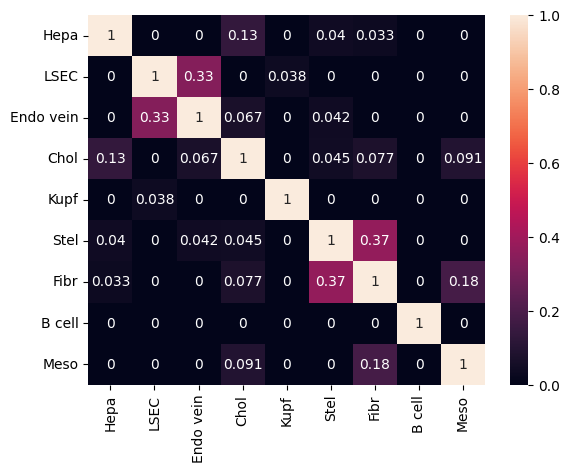

In [33]:
# heatmap of Jaccard similarity
sns.heatmap(Jaccard_sim,annot=True)

In [5]:
ad_sc = sc.read('/home/wout/Documents/Thesis_lokaal/Data_to_create_liver_atlas/adataAtlasRESOLVE.h5ad')
ad_sc=ad_sc[ad_sc.obs.typeSample=='nucSeq']


In [6]:
ad_sc

View of AnnData object with n_obs × n_vars = 18666 × 31053
    obs: 'annot', 'typeSample', 'cluster_orig', 'annotation_CD45Neg', 'annotation_Fibro', 'annotation'
    uns: 'annot_colors'
    obsm: 'X_umap'

In [7]:
np.unique(ad_sc.obs['annotation'])

array(['B cells', 'Cholangiocytes', 'Endothelial cells', 'Hepatocytes',
       'HsPCs', 'Kupffer cells', 'LECs', 'LSECs', 'Mesothelial cells',
       'Other_ImmuneCells', 'VSMC', 'central_vein_EC45', 'fibroblast',
       'portal_vein_EC45', 'stellate'], dtype=object)

In [8]:
# substitute values in ad_sc.obs['annot'] 
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['stellate'], 'Stel')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['central_vein_EC45','portal_vein_EC45','Endothelial cells'], 'Endo vein')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['fibroblast'], 'Fibr')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['Mesothelial cells'], 'Meso')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['Cholangiocytes'], 'Chol')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['Hepatocytes'], 'Hepa')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['Kupffer cells'], 'Kupf')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['B cells'], 'B cell')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['LSECs'], 'LSEC')

np.unique(ad_sc.obs['annotation'])

/tmp/ipykernel_50686/3583617197.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['stellate'], 'Stel')


array(['B cell', 'Chol', 'Endo vein', 'Fibr', 'Hepa', 'HsPCs', 'Kupf',
       'LECs', 'LSEC', 'Meso', 'Other_ImmuneCells', 'Stel', 'VSMC'],
      dtype=object)

In [9]:
# calculate proportions of each value in column 'annotation' in ad_sc
ad_sc.obs['annotation'].value_counts(normalize=True)

Hepa                 0.579985
Stel                 0.137683
LSEC                 0.092414
Kupf                 0.032037
Endo vein            0.031662
Fibr                 0.030430
Meso                 0.027965
Chol                 0.026733
HsPCs                0.022126
Other_ImmuneCells    0.008250
B cell               0.006215
VSMC                 0.003268
LECs                 0.001232
Name: annotation, dtype: float64

In [10]:
# to dataframe
df_atlas = pd.DataFrame(ad_sc.obs['annotation'].value_counts(normalize=True))
# only select the rows with index in list
df_atlas = df_atlas.loc[marker_genes_basic.columns]
df_atlas.sort_index(inplace=True)
df_atlas

,annotation
B cell,0.006215
Chol,0.026733
Hepa,0.579985
Kupf,0.032037
LSEC,0.092414
Meso,0.027965
Endo vein,0.031662
Fibr,0.030430
Stel,0.137683


In [11]:
# change name of column 
df_atlas.columns = ['atlas']
# write to csv
df_atlas.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/basic_annotation_percentage_atlas.csv")